In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('/content/company_finances.csv')

df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2023.0,"211,915,000,000","72,361,000,000","411,976,000,000","205,753,000,000","87,582,000,000"
1,Microsoft,2022.0,"198,270,000,000","72,738,000,000","364,840,000,000","198,298,000,000","89,035,000,000"
2,Microsoft,2021.0,"168,088,000,000","61,271,000,000","333,779,000,000","191,791,000,000","76,740,000,000"
3,Tesla,2023.0,"96,773,000,000","14,974,000,000","106,618,000,000","43,009,000,000","13,256,000,000"
4,Tesla,2022.0,"81,462,000,000","12,587,000,000","82,338,000,000","36,440,000,000","14,724,000,000"
5,Tesla,2021.0,"53,823,000,000","5,644,000,000","62,131,000,000","30,548,000,000","11,497,000,000"
6,Apple,2023.0,"383,285,000,000","96,995,000,000","352,583,000,000","290,437,000,000","110,543,000,000"
7,Apple,2022.0,"394,328,000,000","99,803,000,000","352,755,000,000","302,083,000,000","122,151,000,000"
8,Apple,2021.0,"365,817,000,000","94,680,000,000","351,002,000,000","287,912,000,000","104,038,000,000"
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_head = df.head()
df_info = df.dtypes

df_head, df_info

(     Company    Year  Total Revenue    Net Income  Total Assets  \
 0  Microsoft  2023.0   2.119150e+11  7.236100e+10  4.119760e+11   
 1  Microsoft  2022.0   1.982700e+11  7.273800e+10  3.648400e+11   
 2  Microsoft  2021.0   1.680880e+11  6.127100e+10  3.337790e+11   
 3      Tesla  2023.0   9.677300e+10  1.497400e+10  1.066180e+11   
 4      Tesla  2022.0   8.146200e+10  1.258700e+10  8.233800e+10   
 
    Total Liabilities  Cash Flow from Operating Activities  
 0       2.057530e+11                         8.758200e+10  
 1       1.982980e+11                         8.903500e+10  
 2       1.917910e+11                         7.674000e+10  
 3       4.300900e+10                         1.325600e+10  
 4       3.644000e+10                         1.472400e+10  ,
 Company                                 object
 Year                                   float64
 Total Revenue                          float64
 Net Income                             float64
 Total Assets                  

In [8]:
financial_cols = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities'
]

# Only clean if dtype is object (string)
for col in financial_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)

# Convert Year to integer if it's not already int
if df['Year'].dtype != 'int':
    df['Year'] = df['Year'].dropna().astype(int)

# Confirm the fix
df_cleaned_head = df.head()
df_cleaned_info = df.dtypes

df_cleaned_head, df_cleaned_info


(     Company    Year  Total Revenue    Net Income  Total Assets  \
 0  Microsoft  2023.0   2.119150e+11  7.236100e+10  4.119760e+11   
 1  Microsoft  2022.0   1.982700e+11  7.273800e+10  3.648400e+11   
 2  Microsoft  2021.0   1.680880e+11  6.127100e+10  3.337790e+11   
 3      Tesla  2023.0   9.677300e+10  1.497400e+10  1.066180e+11   
 4      Tesla  2022.0   8.146200e+10  1.258700e+10  8.233800e+10   
 
    Total Liabilities  Cash Flow from Operating Activities  
 0       2.057530e+11                         8.758200e+10  
 1       1.982980e+11                         8.903500e+10  
 2       1.917910e+11                         7.674000e+10  
 3       4.300900e+10                         1.325600e+10  
 4       3.644000e+10                         1.472400e+10  ,
 Company                                 object
 Year                                   float64
 Total Revenue                          float64
 Net Income                             float64
 Total Assets                  

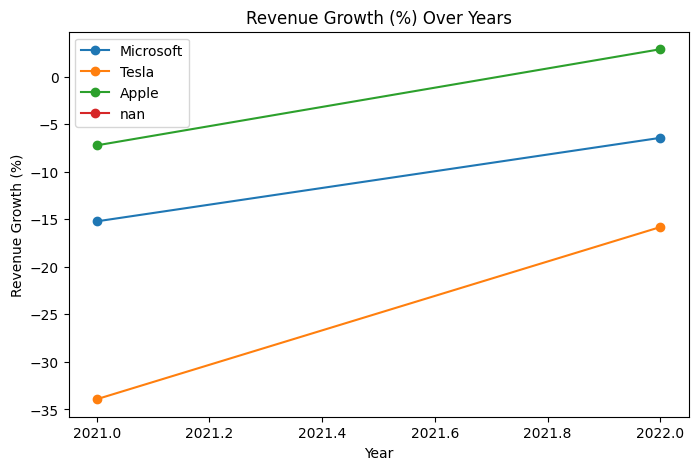

In [11]:
# Plot Revenue Growth (%)

plt.figure(figsize=(8, 5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Revenue Growth (%)'], marker='o', label=company)

plt.title('Revenue Growth (%) Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue Growth (%)')
plt.legend()
plt.show()

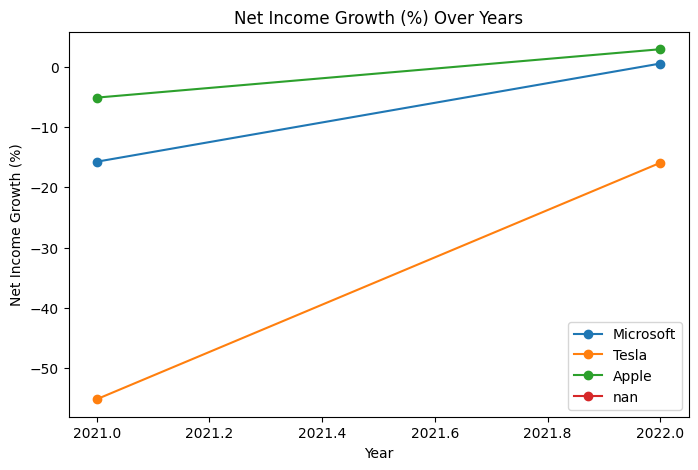

In [12]:
#  Repeat for Net Income Growth (%)
plt.figure(figsize=(8, 5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Net Income Growth (%)'], marker='o', label=company)

plt.title('Net Income Growth (%) Over Years')
plt.xlabel('Year')
plt.ylabel('Net Income Growth (%)')
plt.legend()
plt.show()


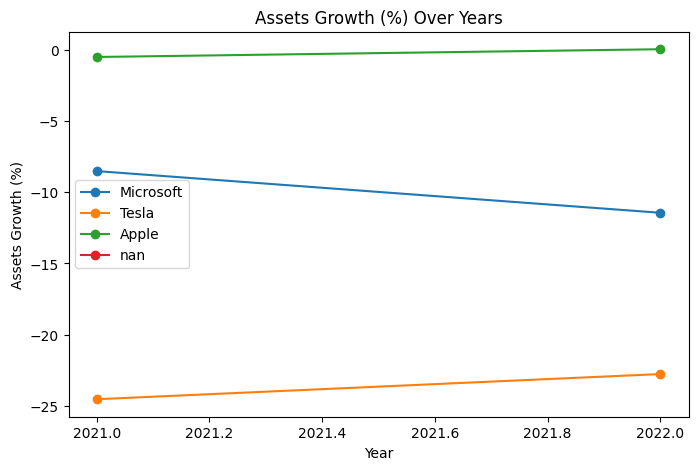

In [13]:
# Assets Growth (%) Plot:
plt.figure(figsize=(8, 5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Assets Growth (%)'], marker='o', label=company)

plt.title('Assets Growth (%) Over Years')
plt.xlabel('Year')
plt.ylabel('Assets Growth (%)')
plt.legend()
plt.show()


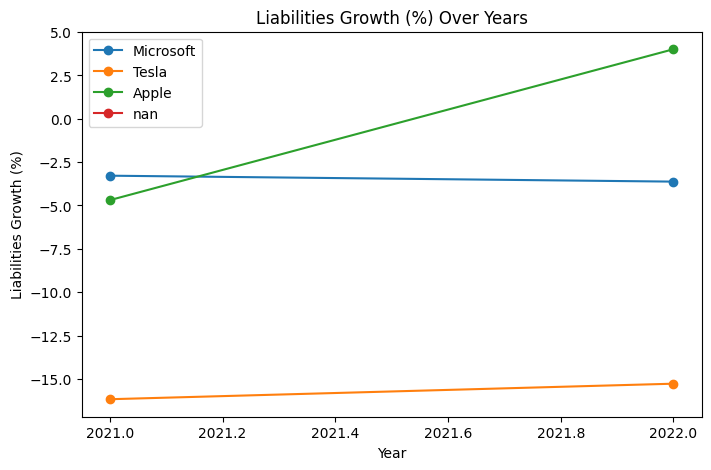

In [14]:
#  Liabilities Growth (%) Plot:
plt.figure(figsize=(8, 5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Liabilities Growth (%)'], marker='o', label=company)

plt.title('Liabilities Growth (%) Over Years')
plt.xlabel('Year')
plt.ylabel('Liabilities Growth (%)')
plt.legend()
plt.show()


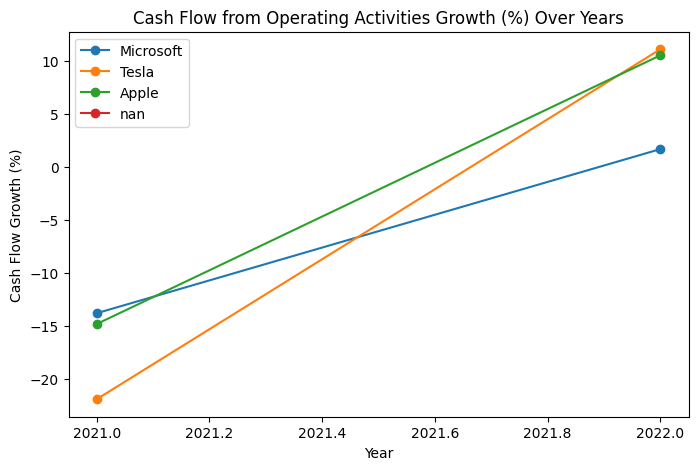

In [15]:
# Cash Flow Growth (%) Plot:
plt.figure(figsize=(8, 5))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Year'], subset['Cash Flow Growth (%)'], marker='o', label=company)

plt.title('Cash Flow from Operating Activities Growth (%) Over Years')
plt.xlabel('Year')
plt.ylabel('Cash Flow Growth (%)')
plt.legend()
plt.show()
